# Programming Assignment - 8
---
## Name: Patrick McElroy
---

In [135]:
# Import required packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
import os
from PIL import Image


np.random.seed(100)

## Question 1
---
Implement the multiplicative NMF algorithm discussed in class. Write a function lee_seung(V, k, maxiteration) that takes a nonnegative matrix V and returns W and H.  For test, create a random nonnegative matrix of dimension 200x500 where the elements are uniformly distributed in [0,1]. Print the value $ \|V-WH\|_F /\|V\|_F$.

In [136]:
# Your code comes here
def lee_seung(V, p, maxIter):
    m,n = V.shape
    W = np.random.rand(m,p) # Use Numpy Tutorial for a random nonneagtive initalization mxp
    H = np.random.rand(p,n) # Use Numpy Tutorial for a random nonneagtive initalization pxn
    for iter in range(maxIter):
        Hnext = H* (W.T @ V)/(W.T  @ (W @ H))
        Wnext = W* (V @ Hnext.T)/((W @ Hnext) @ Hnext.T)
        H = Hnext
        W = Wnext
    
    relError = np.linalg.norm(V-W@H, ord='fro')/np.linalg.norm(V, ord='fro')
    return W, H, relError

# test your code
V = np.random.uniform(0, 1, size=(200, 500)) # Make appropriate changes
W, H, relError = lee_seung(V, 5, 100)
print(relError)

0.48912135626927966


In [137]:
nmf1 = NMF(n_components=100, random_state = 1)
W1 = nmf1.fit_transform(V)
H1 = nmf1.components_

relError1 = np.linalg.norm(V-W1@H1, ord='fro')/np.linalg.norm(V, ord='fro')
relError1

/Users/patrickmcelroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/Users/patrickmcelroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


0.31457779490185883

## Question 2
---
Find the nonnegative basis representation of images from one of the following databases. Show a comparison of some sample images with their reconstruction from the basis.

>- The ORL database of faces at [ORL link](http://cam-orl.co.uk/facedatabase.html/#:~:text=Our%20Database%20of%20Faces%2C%20%28formerly%20%27The%20ORL%20Database,Robotics%20Group%20of%20the%20Cambridge%20University%20Engineering%20Department.).

>- The CBCL database of faces at [MIT link](http://cbcl.mit.edu/software-datasets/heisele/facerecognition-database.html).

>- Yale faces B facial images at [UCSD](http://vision.ucsd.edu/~leekc/ExtYaleDatabase/ExtYaleB.html).

In [138]:
# Your code starts here.

def plot_gallary(images, height, width, rows, cols):
    plt.figure(figsize=(2 * cols, 2 * rows))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.30,)
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((height, width)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())


dir = '/Users/patrickmcelroy/Desktop/Graduate School/MA 544/Python/Module 7/MIT-CBCL-facerec-database/test'
subject_faces=os.listdir(dir)[0:]

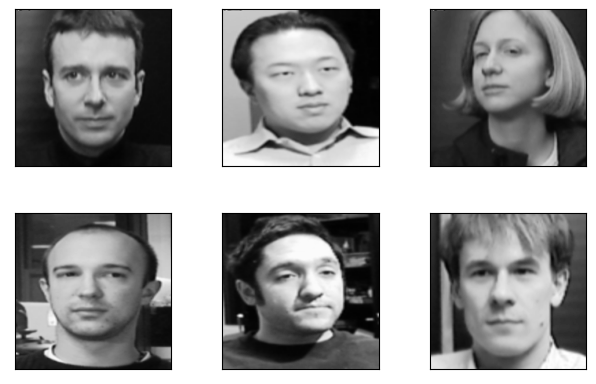

In [144]:
subject_ones=np.array([dir+'/' + face for face in subject_faces])
all_images=np.array([plt.imread(face) for face in subject_ones], dtype=np.float64)
n_samples, h, w = all_images.shape
X = all_images.reshape(n_samples, h*w)
V = X[:,0:2000]
n_samples, n_features = X.shape
n_row = 2
n_col = 3

plot_gallary(all_images, h, w, rows=n_row, cols=n_col)

In [140]:
# This function finds a low dimensional basis representation of the images
def basis(X, n_pc):
    fcs = NMF(n_components=n_pc, random_state =1)
    projected  = fcs.fit_transform(X)
    #U, S, V = np.linalg.svd(centered_data)
    components = fcs.components_
    #projected = U[:,:n_pc]*S[:n_pc]
    
    return projected, components

In [141]:
n_components = 50
W, H = basis(X, n_components)
print(W.shape)
print(H.shape)

/Users/patrickmcelroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/Users/patrickmcelroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


(2000, 50)
(50, 40000)


In [142]:
Y = np.dot(W, H)
Y.shape
reconstruction = Y.reshape(n_samples, h, w)

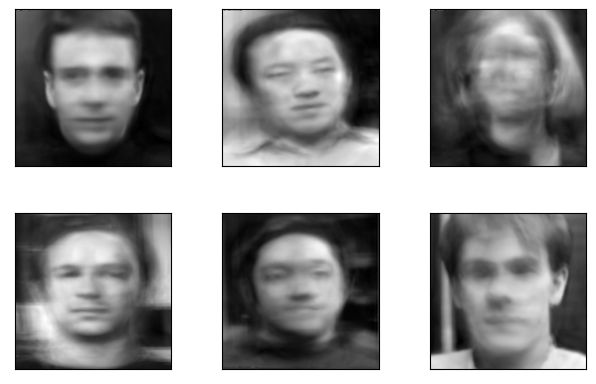

In [143]:
plot_gallary(reconstruction, h, w, rows=n_row, cols=n_col)